In [32]:
import tensorflow as tf


In [33]:
tf.__version__

'2.4.1'

In [34]:
data = "./"

In [35]:
train_link  = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [36]:
## Thu vien dung de load file
import pickle

In [37]:
with open(train_link, mode="rb") as f:
    train = pickle.load(f)
with open(valid_link, mode="rb") as f:
    valid = pickle.load(f)
with open(test_link, mode="rb") as f:
    test = pickle.load(f)

In [38]:
trainX = train["features"]
trainY = train["labels"]

In [39]:
import matplotlib.pyplot as plt

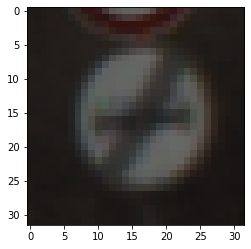

In [40]:
plt.imshow(trainX[12])

In [41]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [42]:
classNames[trainY[0]]

'End of no passing'

In [43]:
from sklearn.utils import shuffle

In [44]:
trainX, trainY = shuffle(trainX, trainY)

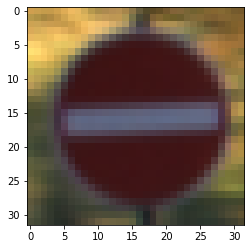

In [45]:
plt.imshow(trainX[0])


In [46]:
validX = valid["features"]
validY = valid["labels"]

In [47]:
testX = test["features"]
testY = test["labels"]

In [48]:
# Buoc tiep theo la phai chuan hoa ve [0,1]

trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [49]:
trainX[0]

array([[[0.81568627, 0.62352941, 0.30980392],
        [0.79215686, 0.62352941, 0.30588235],
        [0.77254902, 0.61176471, 0.29411765],
        ...,
        [0.49803922, 0.39215686, 0.18431373],
        [0.45882353, 0.35686275, 0.17647059],
        [0.45882353, 0.34901961, 0.16862745]],

       [[0.71764706, 0.59607843, 0.29019608],
        [0.68627451, 0.56862745, 0.27058824],
        [0.65490196, 0.52941176, 0.25098039],
        ...,
        [0.51372549, 0.39607843, 0.19607843],
        [0.49803922, 0.38431373, 0.18431373],
        [0.50196078, 0.38039216, 0.18431373]],

       [[0.80392157, 0.63921569, 0.3254902 ],
        [0.79607843, 0.64313725, 0.33333333],
        [0.78431373, 0.61960784, 0.3254902 ],
        ...,
        [0.46666667, 0.36078431, 0.17254902],
        [0.50196078, 0.38039216, 0.17254902],
        [0.52156863, 0.38431373, 0.17647059]],

       ...,

       [[0.36470588, 0.34901961, 0.24705882],
        [0.30588235, 0.31372549, 0.23137255],
        [0.24313725, 0

In [50]:
# Chuyen labels sang dang one-hot encoding
from sklearn.preprocessing import LabelBinarizer

In [51]:
lb  = LabelBinarizer()

In [52]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [87]:
# Xay dung model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

In [55]:
width = 32
height = 32
classes = 43

In [56]:
shape = (width, height, 3)

In [58]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [66]:
model.add(Activation("relu"))

In [68]:
model.add(BatchNormalization())

In [70]:
model.add(Conv2D(32, (3,3), padding="same"))

In [71]:
model.add(Activation("relu"))

In [72]:
model.add(BatchNormalization())

In [74]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [76]:
model.add(Conv2D(64, (3,3), padding="same"))

In [77]:
model.add(Activation("relu"))

In [78]:
model.add(BatchNormalization())

In [79]:
model.add(Conv2D(64, (3,3), padding="same"))


In [80]:
model.add(Activation("relu"))


In [81]:
model.add(BatchNormalization())


In [82]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [85]:
model.add(Flatten())

In [88]:
model.add(Dense(512))

In [89]:
model.add(Activation("relu"))

In [90]:
model.add(BatchNormalization())

In [91]:
model.add(Dense(classes))

In [92]:
model.add(Activation("softmax"))


In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0